In [63]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.model_selection import train_test_split


import os

In [52]:
DATA_PATH = '../data/'

In [6]:
df = pd.read_csv(os.path.join(DATA_PATH, 'student-mat.csv'))

In [25]:
df['total_grade'] = df[['G1', 'G2', 'G3']].sum(axis=1)/60

In [185]:
X = df.iloc[:,:30]

In [184]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0.283333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0.266667
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0.416667
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0.733333
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0.450000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,0.766667
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,0.416667
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,0.550000


In [106]:
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
               'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
               'higher', 'internet', 'romantic']

In [107]:
from sklearn.preprocessing import LabelEncoder

In [188]:
from sklearn.preprocessing import OneHotEncoder

In [197]:
le = OneHotEncoder()
X_cat = le.fit_transform(X[categorical].values).toarray()
X_numeric = X.drop(columns=categorical).values

In [193]:
import numpy as np

In [194]:
X_numeric

array([[18,  4,  4, ...,  1,  3,  6],
       [17,  1,  1, ...,  1,  3,  4],
       [15,  1,  1, ...,  3,  3, 10],
       ...,
       [21,  1,  1, ...,  3,  3,  3],
       [18,  3,  2, ...,  4,  5,  0],
       [19,  1,  1, ...,  3,  5,  5]], dtype=int64)

In [198]:
X = np.concatenate([X_cat, X_numeric], axis=1)

In [199]:
y = df['total_grade'] > .65

In [200]:
# X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,y_train)

In [201]:
clf.classes_

array([False,  True])

In [202]:
from yellowbrick.classifier import ROCAUC

In [203]:
visualizer = ROCAUC(clf, classes=['fail', 'pass'])

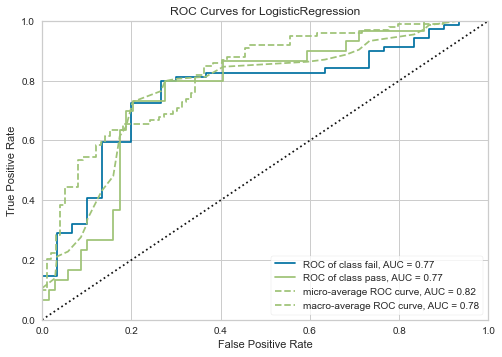

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [204]:
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   